In [1]:
# Reading the Training Data
import pandas as pd
dataset = pd.read_csv(r"D:\apple plant\plant\plant\train.csv")

In [2]:
# Importing Necessary Libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

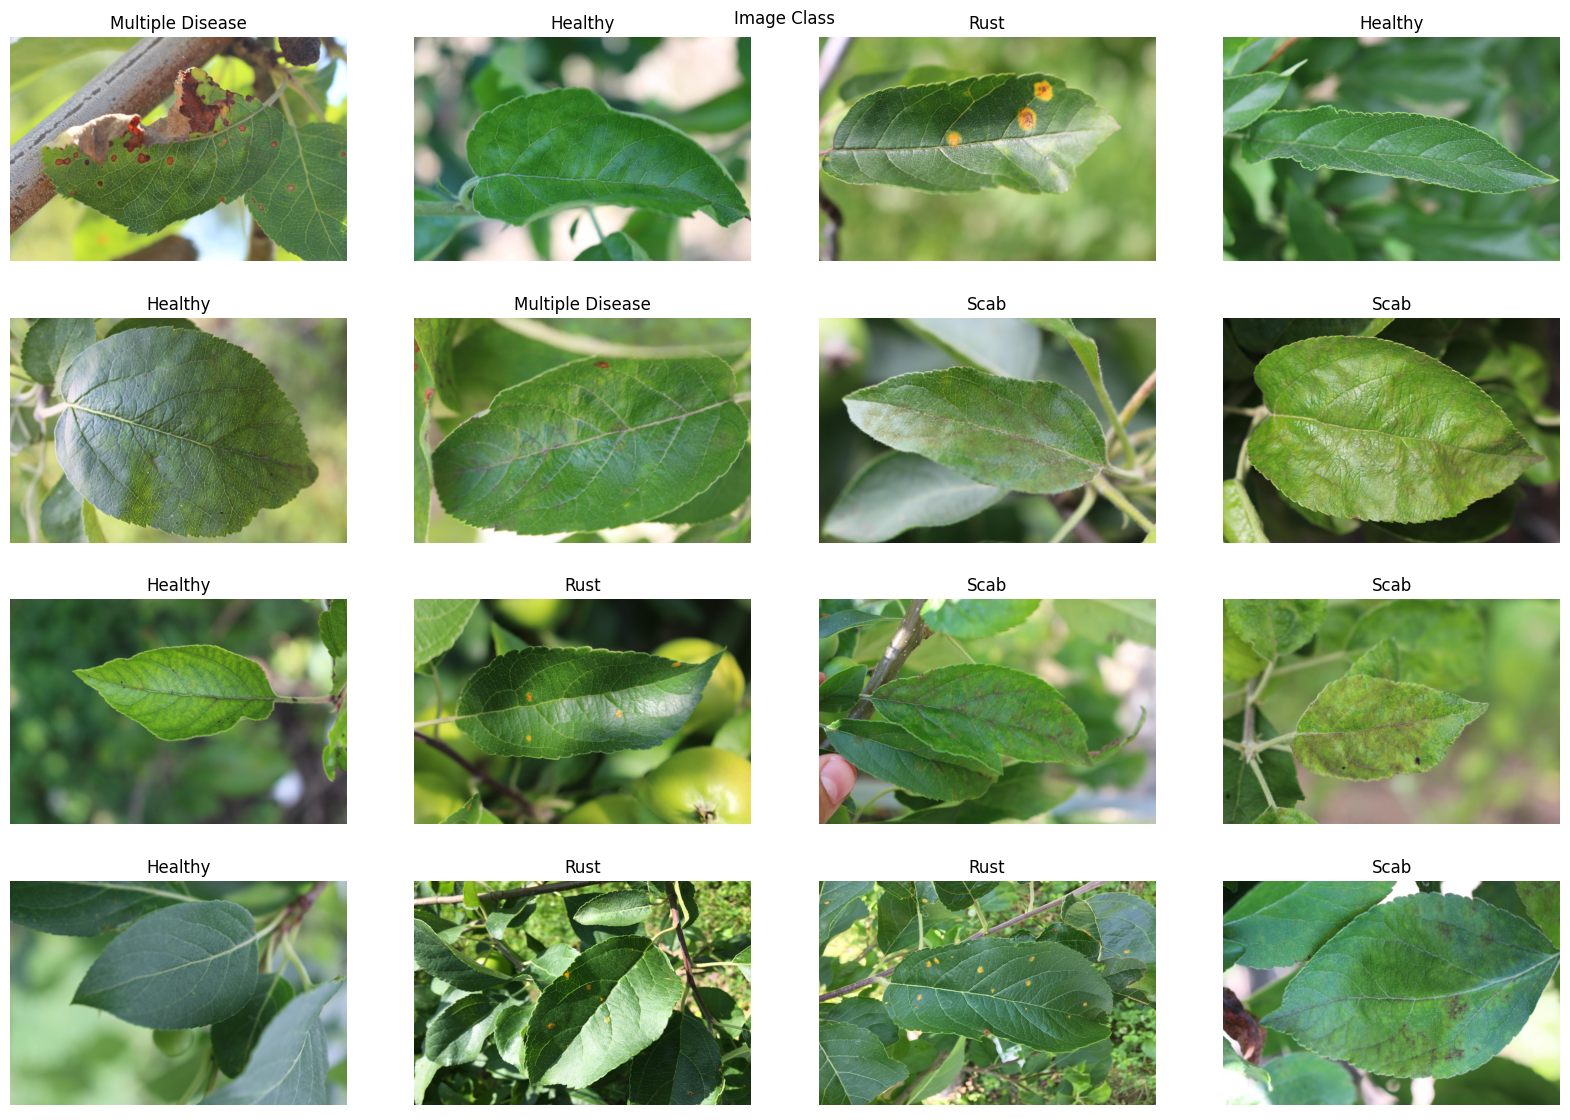

In [3]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'D:/apple plant/plant/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')
    plt.imshow(img)
    plt.axis('off')
plt.show()

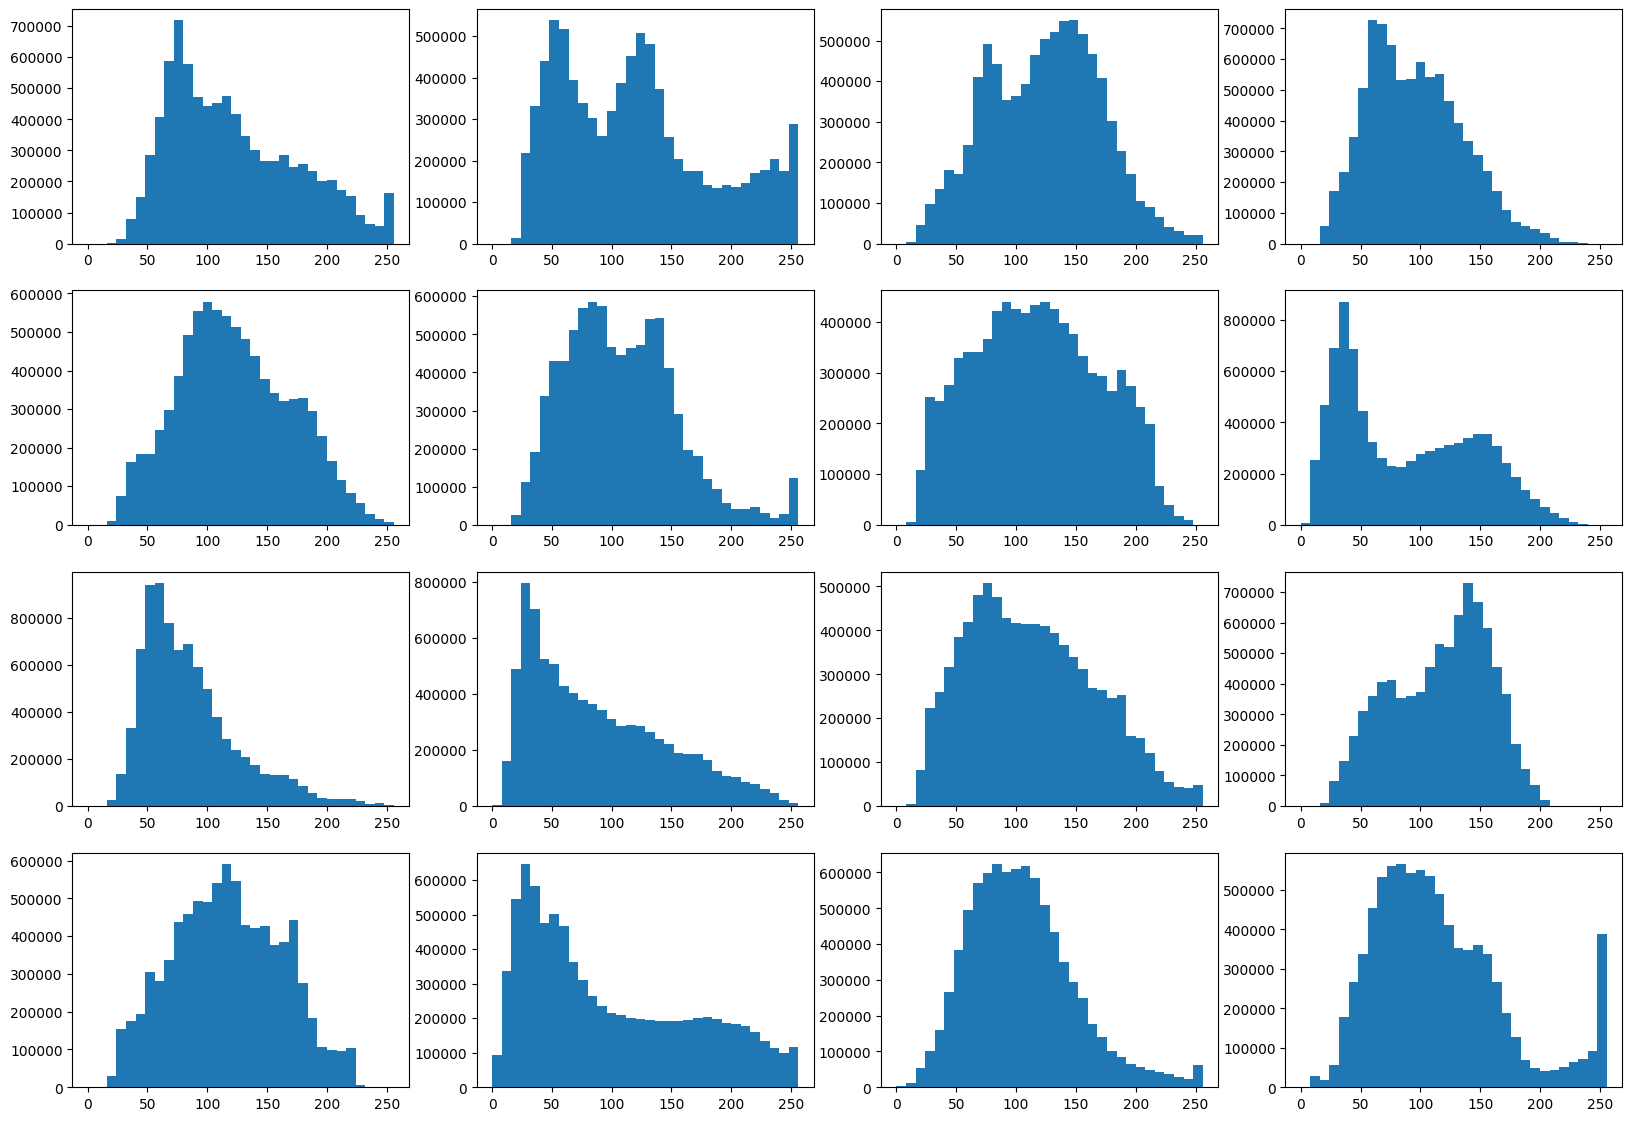

In [4]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'D:/apple plant/plant/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

In [5]:

dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

In [6]:
dataset['image_id'] = dataset['image_id']+'.jpg'

In [7]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

In [8]:
BATCH_SIZE = 32

train_generator = datagen.flow_from_dataframe(X_train,
                    directory=r'D:/apple plant/plant/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(224, 224),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory=r'D:/apple plant/plant/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(224, 224),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

Found 1456 validated image filenames.
Found 365 validated image filenames.


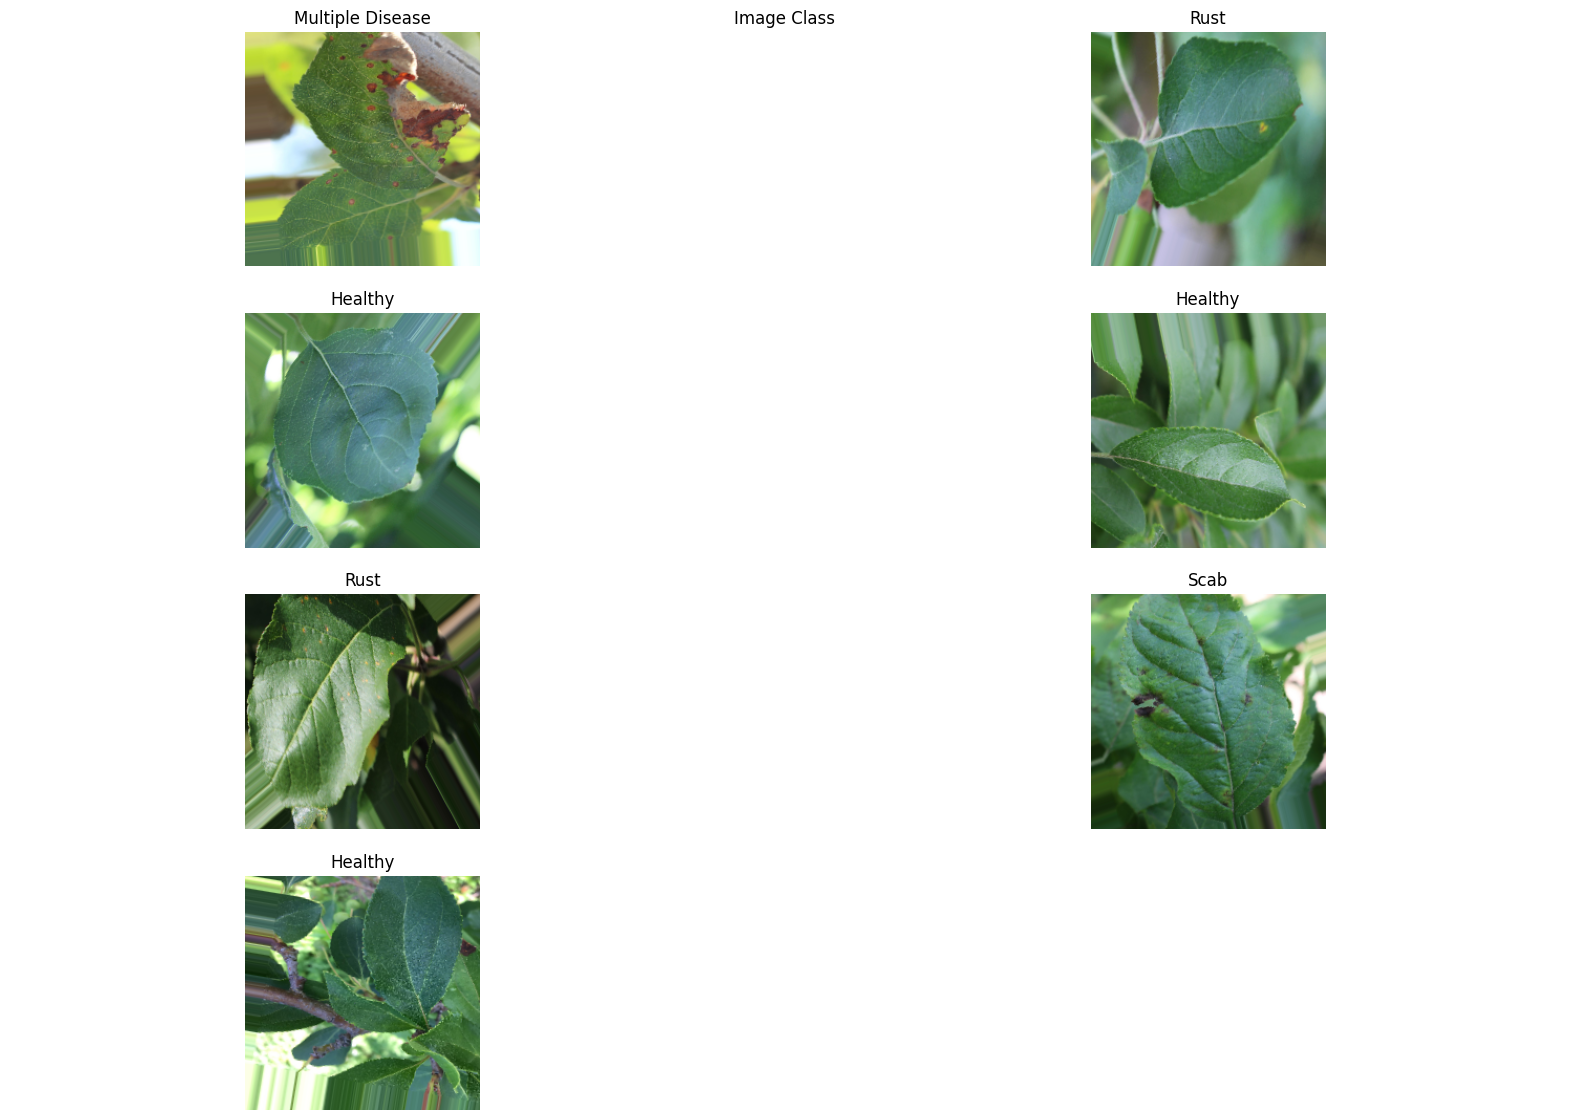

In [9]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows):

    img_batch, label_batch = next(train_generator)
    fig.add_subplot(rows, columns, i)

    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    plt.imshow(img_batch[i])
    plt.axis('off')
plt.show()

In [10]:
from tensorflow.keras import regularizers

densenet_model = tf.keras.models.Sequential([
    tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet',input_shape=(224, 224, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
   tf.keras.layers.Dense(4,activation='softmax',kernel_regularizer=regularizers.l2(0.03))
])
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,564,356 (28.86 MB)

 Trainable params: 7,480,708 (28.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [11]:
tf.keras.utils.plot_model(densenet_model, to_file='densenet_model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [12]:
EPOCHS = 30
BATCH_SIZE = 32

# Train the model
history = densenet_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('densenet_best_model.h5', save_best_only=True, monitor='val_loss')
    ]
)


c:\Users\TEMP.GPU-VNLAB-AJ.012\Desktop\apple plant\python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6767 - loss: 6.5140

46/46 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6791 - loss: 6.4817 - val_accuracy: 0.3425 - val_loss: 23.3290
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8896 - loss: 2.5859

46/46 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8896 - loss: 2.5802 - val_accuracy: 0.6548 - val_loss: 5.9049
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9146 - loss: 1.6032

46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9145 - loss: 1.6012 - val_accuracy: 0.8356 - val_loss: 1.8066
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9067 - loss: 1.1608 - val_accuracy: 0.6466 - val_loss: 1.9324
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9325 - loss: 0.7846

46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9323 - loss: 0.7843 - val_accuracy: 0.8329 - val_loss: 1.1533
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9189 - loss: 0.6384

46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9189 - loss: 0.6376 - val_accuracy: 0.8795 - val_loss: 0.6844
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9506 - loss: 0.4329

46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9505 - loss: 0.4328 - val_accuracy: 0.8795 - val_loss: 0.5619
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9328 - loss: 0.4058

46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9330 - loss: 0.4049 - val_accuracy: 0.9205 - val_loss: 0.4022
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9453 - loss: 0.3221 - val_accuracy: 0.9014 - val_loss: 0.4434
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9464 - loss: 0.3087 - val_accuracy: 0.8959 - val_loss: 0.4945
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9436 - loss: 0.2725 - val_accuracy: 0.8521 - val_loss: 0.5795
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9380 - loss: 0.2572 - val_accuracy: 0.8521 - val_loss: 0.5342
Epoch 13/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9495 - loss: 0.2331 - val_accuracy: 0.7753 - val_loss: 0.6937
Epoch 14/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9496 - loss: 0.2138 - val_accuracy: 0.8301 - val_loss: 0.5514
Epoch 15/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9367 - loss: 0.2371 - val_accuracy: 0.7753 - val_lo

46/46 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9508 - loss: 0.2155 - val_accuracy: 0.9233 - val_loss: 0.3144
Epoch 17/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9584 - loss: 0.1810 - val_accuracy: 0.9178 - val_loss: 0.3479
Epoch 18/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9635 - loss: 0.1782 - val_accuracy: 0.8822 - val_loss: 0.4333
Epoch 19/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9673 - loss: 0.1678 - val_accuracy: 0.8795 - val_loss: 0.4349
Epoch 20/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9728 - loss: 0.1414 - val_accuracy: 0.8438 - val_loss: 0.4818
Epoch 21/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9742 - loss: 0.1526 - val_accuracy: 0.8329 - val_loss: 0.5164
Epoch 22/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9664 - loss: 0.1454 - val_accuracy: 0.8795 - val_loss: 0.3990
Epoch 23/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9725 - loss: 0.1337 - val_accuracy: 0.8849 - val_l

In [14]:
from tensorflow.keras.models import load_model
model = load_model(r"C:\Users\TEMP.GPU-VNLAB-AJ.012\Desktop\apple plant\densenet_best_model.h5")
model.evaluate(valid_generator)

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 533ms/step - accuracy: 0.9138 - loss: 0.3069


[0.2938760817050934, 0.9178082346916199]

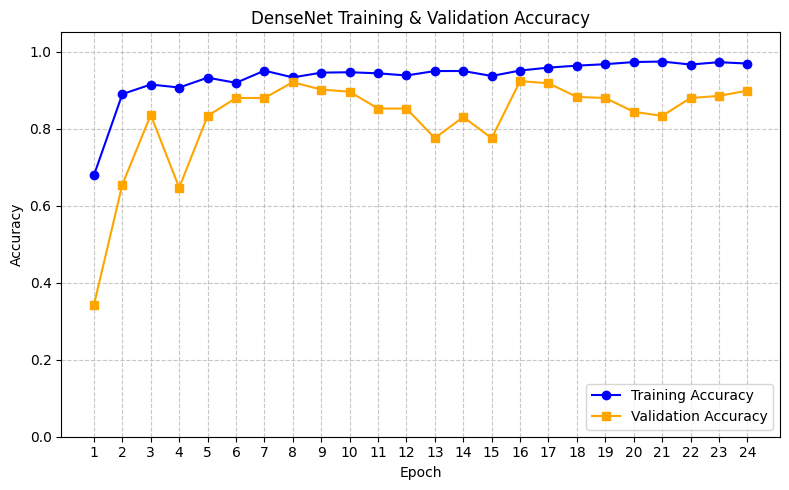

In [15]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 25)
train_accuracy = [
    0.6791, 0.8896, 0.9145, 0.9067, 0.9323, 0.9189, 0.9505, 0.9330,
    0.9453, 0.9464, 0.9436, 0.9380, 0.9495, 0.9496, 0.9367, 0.9508,
    0.9584, 0.9635, 0.9673, 0.9728, 0.9742, 0.9664, 0.9725, 0.9689
]
val_accuracy = [
    0.3425, 0.6548, 0.8356, 0.6466, 0.8329, 0.8795, 0.8795, 0.9205,
    0.9014, 0.8959, 0.8521, 0.8521, 0.7753, 0.8301, 0.7753, 0.9233,
    0.9178, 0.8822, 0.8795, 0.8438, 0.8329, 0.8795, 0.8849, 0.8986
]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, marker='o', color='blue', label='Training Accuracy')
plt.plot(epochs, val_accuracy, marker='s', color='orange', label='Validation Accuracy')
plt.title('DenseNet Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

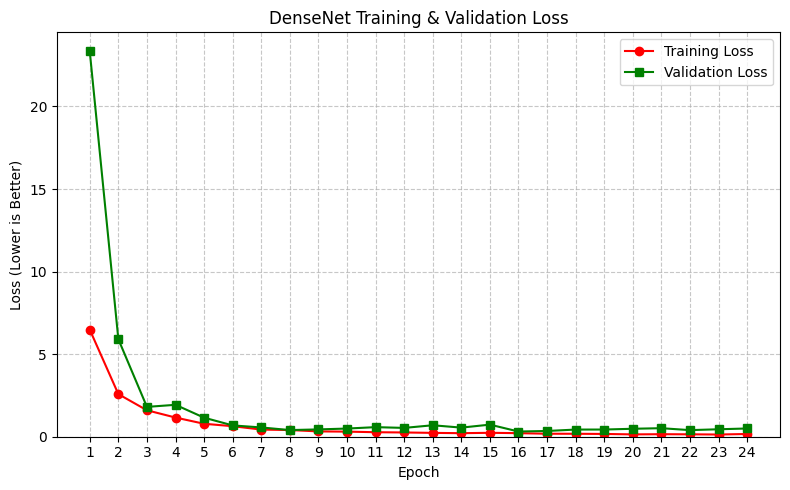

In [16]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 25)
train_loss = [
    # Replace with your DenseNet training loss per epoch
    6.4817, 2.5802, 1.6012, 1.1608, 0.7843, 0.6376, 0.4328, 0.4049,
    0.3221, 0.3087, 0.2725, 0.2572, 0.2331, 0.2138, 0.2371, 0.2155,
    0.1810, 0.1782, 0.1678, 0.1414, 0.1526, 0.1454, 0.1337, 0.1651
]
val_loss = [
    # Replace with your DenseNet validation loss per epoch
    23.3290, 5.9049, 1.8066, 1.9324, 1.1533, 0.6844, 0.5619, 0.4022,
    0.4434, 0.4945, 0.5795, 0.5342, 0.6937, 0.5514, 0.7322, 0.3144,
    0.3479, 0.4333, 0.4349, 0.4818, 0.5164, 0.3990, 0.4512, 0.4992
]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', color='red', label='Training Loss')
plt.plot(epochs, val_loss, marker='s', color='green', label='Validation Loss')
plt.title('DenseNet Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Lower is Better)')
plt.xticks(epochs)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Found 365 validated image filenames.


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 904ms/step


<Figure size 800x600 with 0 Axes>

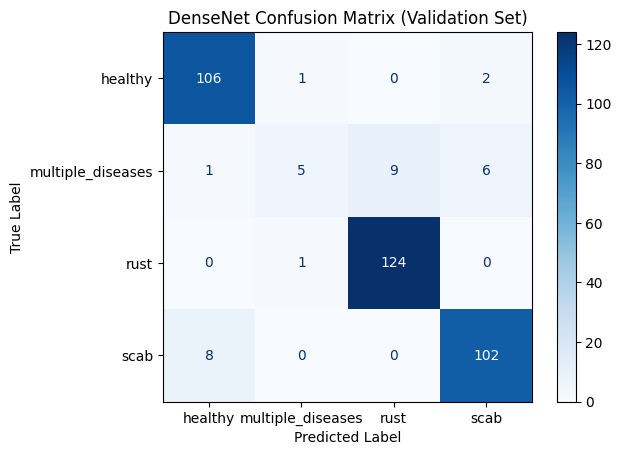

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 1. Load your dataset
dataset = pd.read_csv('/Users/kabilan/Desktop/applant/train.csv')
dataset['image_id'] = dataset['image_id'].astype(str) + '.jpg'

# 2. Split into train and validation sets
X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

# 3. Set batch size
BATCH_SIZE = 32

# 4. Define ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=False,
    rotation_range=180,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=True
)

# 5. Define validation generator
valid_generator = datagen.flow_from_dataframe(
    X_valid,
    directory='/Users/kabilan/Desktop/applant/images/',
    x_col='image_id',
    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],
    target_size=(224, 224),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 6. Load your DenseNet model
densenet_model = load_model('densenet_best_model.h5')

# 7. Predict and compute confusion matrix
y_pred_prob = densenet_model.predict(valid_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

all_labels = []
for _, batch_labels in valid_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * valid_generator.batch_size >= valid_generator.samples:
        break
y_true = np.argmax(np.concatenate(all_labels, axis=0), axis=1)

class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('DenseNet Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 872ms/step


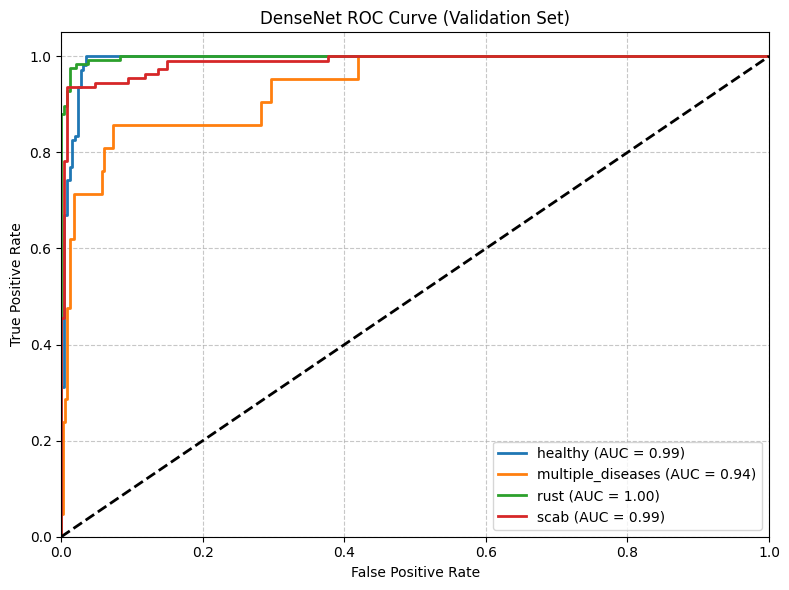

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Get predicted probabilities from the DenseNet model
y_pred_prob = densenet_model.predict(valid_generator)

# 2. Get the true labels from the validation generator
all_labels = []
for _, batch_labels in valid_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * valid_generator.batch_size >= valid_generator.samples:
        break
y_true_onehot = np.concatenate(all_labels, axis=0)

# 3. Plot ROC curve for each class
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
n_classes = y_true_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DenseNet ROC Curve (Validation Set)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()